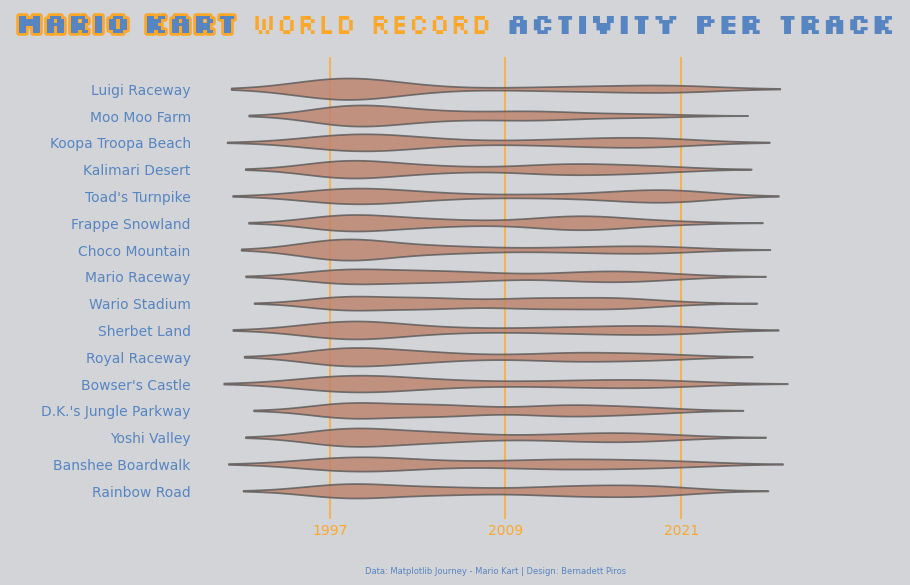

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyfonts import load_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
from pypalettes import get_hex

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
df_mario = pd.read_csv(url)

font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/silkscreen/Silkscreen-Regular.ttf?raw=true")
font_bold = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/silkscreen/Silkscreen-Bold.ttf?raw=true")

df_mario['year'] = pd.to_datetime(df_mario['date']).dt.year
colors = get_hex('AsteroidCity3')

fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='year', y='track', data=df_mario, inner=None,
               color=colors[2], alpha=0.8)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_xticks(ticks=[1997, 2009, 2021])
ax.set_yticks(ticks= df_mario['track'].unique())
ax.tick_params(length=0)

ax.tick_params(
  axis="y",
  labelcolor=colors[3],
)
ax.tick_params(
  axis="x",
  labelcolor=colors[0],
)

ax.vlines(
    [1997, 2009, 2021], 0, 1, 
    transform=ax.get_xaxis_transform(),
    color=colors[0], 
    alpha=0.7,
    zorder=-1
)

def define_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

my_path_effect = define_path_effect(linewidth=4, foreground=colors[0] )

fig_text(
   s='<Mario Kart> World Record <Activity per Track>',
   x=0.45, y=0.95, fontsize=20,
   ha='center', color=colors[0],
   font=font, fig=fig,
   highlight_textprops=[{'font': font_bold, 'color': colors[3],
                         "path_effects": my_path_effect},
                        {'font': font_bold, 'color': colors[3]}])

ax.set_facecolor(colors[1])
fig.set_facecolor(colors[1])

ax.spines[["top", "bottom", "right", "left"]].set_visible(False)

fig.text(0.5, 0.02, "Data: Matplotlib Journey - Mario Kart | Design: Bernadett Piros",
         size=6, ha="center", color=colors[3])

plt.show()

#plt.savefig("violin_mario_kart", dpi=300, bbox_inches='tight', pad_inches=0.2)